In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import gaussian_kde
import matplotlib
import matplotlib.lines as mlines
import eit
plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='cm')

# Static Recovery: Variance Analysis

In [6]:
burn = 50000
frame = 14
ns = [4,5,6]
n_bdy = 32
n_sensor = 8
ylim = (14, 35)

In [3]:
pmm_variances = []
coll_variances = []
actual_ns = []
for n in ns:
    pmm_name = 'results/static_recovery_f{}_n={}/'.format(frame, n)
    coll_name = 'results/static_recovery_f{}_n={}_collocation/'.format(frame, n)
    pmm_samples = np.load(os.path.join(pmm_name, 'results.npy'))
    coll_samples = np.load(os.path.join(coll_name, 'results.npy'))
    
    actual_n = len(eit.grids.construct_circular(n, n_bdy, n_sensor).interior_plus_boundary)
    actual_ns.append(actual_n)
    
    pmm_average_var = np.mean(np.std(np.exp(pmm_samples[burn:]), axis=0))
    coll_average_var = np.mean(np.std(np.exp(coll_samples[burn:]), axis=0))
    
    pmm_variances.append(pmm_average_var)
    coll_variances.append(coll_average_var)

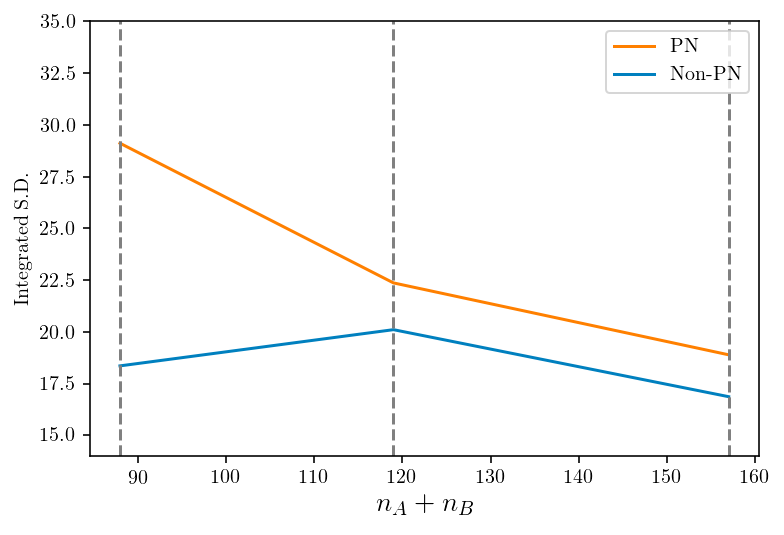

In [7]:
plt.plot(actual_ns, pmm_variances, c=matplotlib.cm.get_cmap('autumn')(0.5), label='PN')
plt.plot(actual_ns, coll_variances, c=matplotlib.cm.get_cmap('winter')(0.5), label='Non-PN')
for n in actual_ns:
    plt.axvline(n, linestyle='--', c='gray')
plt.xlabel('$n_A + n_B$', fontsize=14)
plt.ylabel('Integrated S.D.')
plt.legend()
if ylim is not None:
    plt.ylim(ylim)
plt.savefig('figures/integrated_variance_static.pdf')